# Preprocessing Feature Generation and Importance of Different Features 

# Customer Price Index for All Items

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
cpi_df = pd.read_csv("../Raw Data/Consumer Price Index-CPIAUCSL.csv", parse_dates=[0])

In [3]:
cpi_df.head()

,DATE,CPIAUCSL_NBD20000101
0,2000-01-01,100.00000
1,2000-02-01,100.41347
2,2000-03-01,101.00413
3,2000-04-01,100.94507
4,2000-05-01,101.12227


In [92]:
# px.line(cpi_df, x="DATE", y="CPIAUCSL_NBD20000101")

Text(0.5, 1.0, 'Date vs Consumer Price Index ')

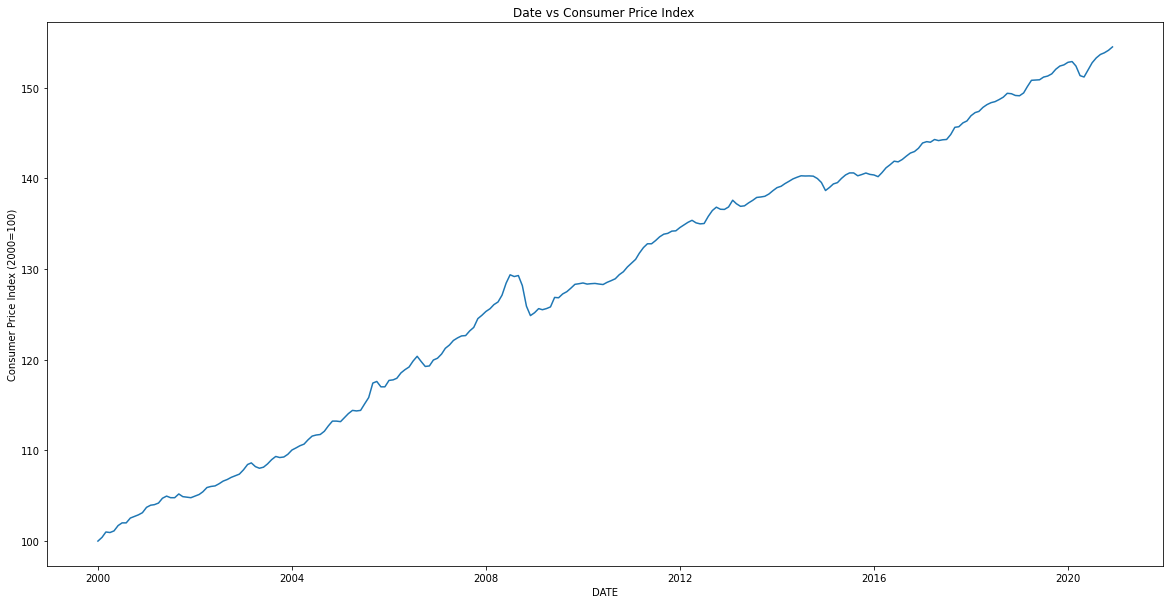

In [74]:
plt.figure(figsize=(20, 10))
plt.plot(cpi_df["DATE"], cpi_df["CPIAUCSL_NBD20000101"])
plt.xlabel("DATE")
plt.ylabel("Consumer Price Index (2000=100)")
plt.title("Date vs Consumer Price Index ")

## Preprocessing and Feature Engineering

In [5]:
# Monthly Change
monthly_change = [0]
percent_monthly_change = [0]

for idx in range(1, len(cpi_df)):
    change = cpi_df.iloc[idx]["CPIAUCSL_NBD20000101"] - cpi_df.iloc[idx-1]["CPIAUCSL_NBD20000101"]
    percent_change = change/cpi_df.iloc[idx-1]["CPIAUCSL_NBD20000101"]
    monthly_change.append(change)
    percent_monthly_change.append(percent_change)

In [6]:
cpi_df["Monthly Change"] = monthly_change
cpi_df["Percent Monthly Change"] = percent_monthly_change

In [7]:
# Yearly Change
yearly_change = [np.NaN for _ in range(12)]
percent_yearly_change = [np.NaN for _ in range(12)]

for idx in range(12, len(cpi_df)):
    change = cpi_df.iloc[idx]["CPIAUCSL_NBD20000101"] - cpi_df.iloc[idx-12]["CPIAUCSL_NBD20000101"]
    percent_change = change/cpi_df.iloc[idx-12]["CPIAUCSL_NBD20000101"]
    yearly_change.append(change)
    percent_yearly_change.append(percent_change*100)

In [8]:
cpi_df["Yearly Change"] = yearly_change
cpi_df["Percent Yearly Change"] = percent_yearly_change

In [37]:
# cpi_df.to_csv("../Dataset/CPI.csv", index=False)

## Plotting and Comparing

In [9]:
houseIndex_df = pd.read_csv("../Dataset/cshpi_processed.csv", parse_dates=[0])

In [10]:
houseIndex_df

,observation_date,CSUSHPISA,Change from Last Month,Percent Change from Last Month,Change From Year Ago,Percent Change From Year Ago
0,2000-01-01,100.552,0.000,0.000000,NaN,NaN
1,2000-02-01,101.339,0.787,0.782680,NaN,NaN
2,2000-03-01,102.127,0.788,0.777588,NaN,NaN
3,2000-04-01,102.922,0.795,0.778443,NaN,NaN
4,2000-05-01,103.677,0.755,0.733565,NaN,NaN
...,...,...,...,...,...,...
247,2020-08-01,222.432,2.782,1.266560,12.246,5.826268
248,2020-09-01,225.608,3.176,1.427852,14.729,6.984574
249,2020-10-01,229.339,3.731,1.653753,17.746,8.386856
250,2020-11-01,232.673,3.334,1.453743,20.164,9.488539


In [11]:
cpi_df =pd.read_csv("../Dataset/CPI.csv", parse_dates=[0])

### CPI (Consumer Price Index ) vs House Price Index :- Monthly Change

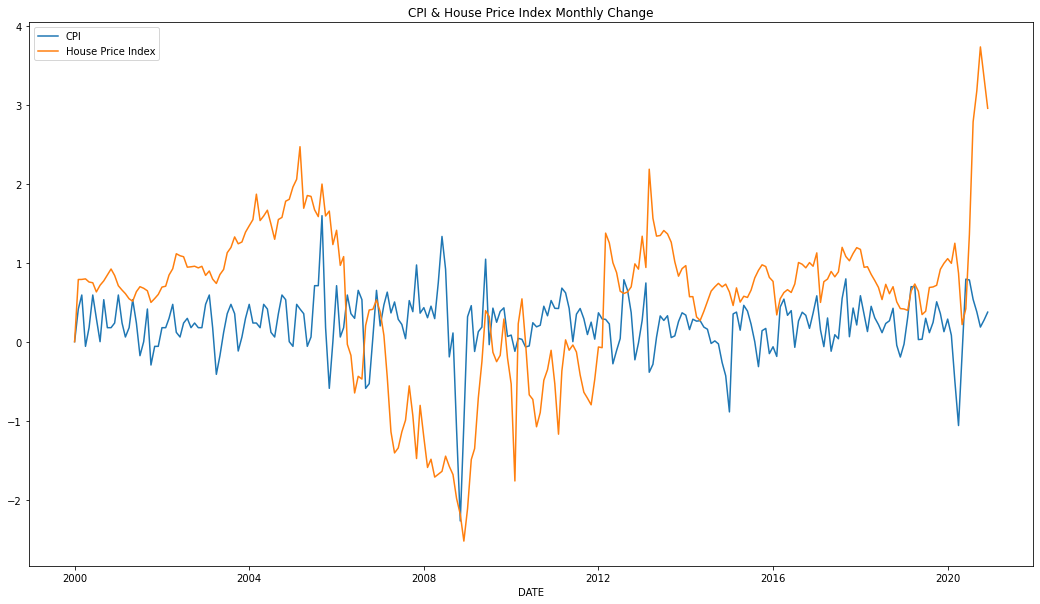

In [85]:
plt.figure(figsize=(18, 10))
plt.plot(cpi_df["DATE"], cpi_df["Monthly Change"], label="CPI")
plt.plot(cpi_df["DATE"], houseIndex_df["Change from Last Month"], label="House Price Index")
plt.xlabel("DATE")
plt.title("CPI & House Price Index Monthly Change")
plt.legend()

In [91]:
# px.line(x=cpi_df["DATE"], y=[cpi_df["Monthly Change"] , houseIndex_df["Change from Last Month"]])

### CPI vs House Price Index :- Yearly Change

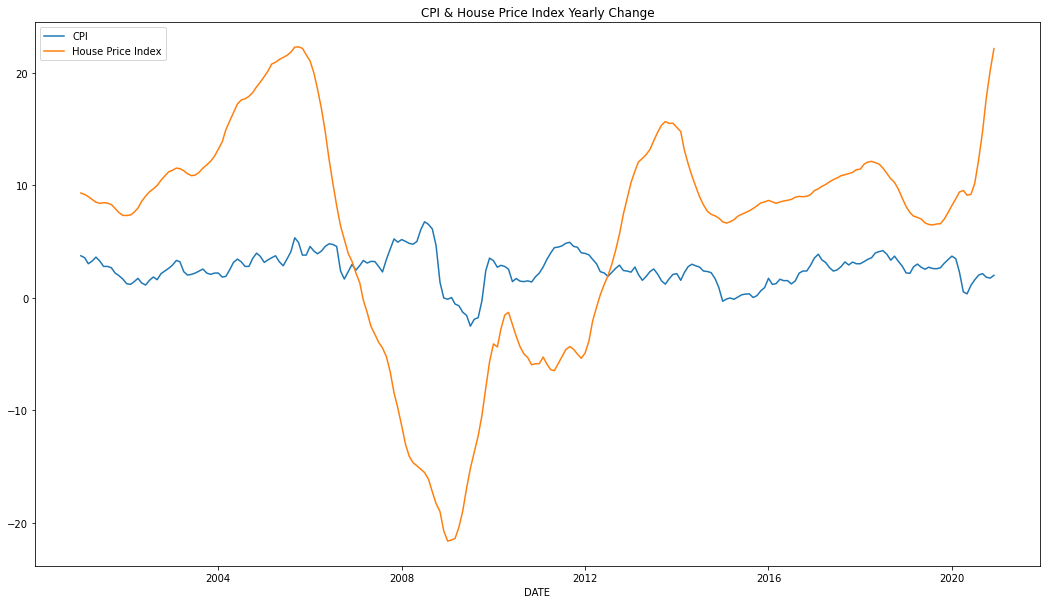

In [87]:
plt.figure(figsize=(18, 10))
plt.plot(cpi_df["DATE"], cpi_df["Yearly Change"], label="CPI")
plt.plot(cpi_df["DATE"], houseIndex_df["Change From Year Ago"], label="House Price Index")
plt.xlabel("DATE")
plt.title("CPI & House Price Index Yearly Change")
plt.legend()

In [90]:
# px.line(x=cpi_df["DATE"], y=[cpi_df["Yearly Change"] , houseIndex_df["Change From Year Ago"]])

### CPI vs House Price Index : Percent Yearly Change

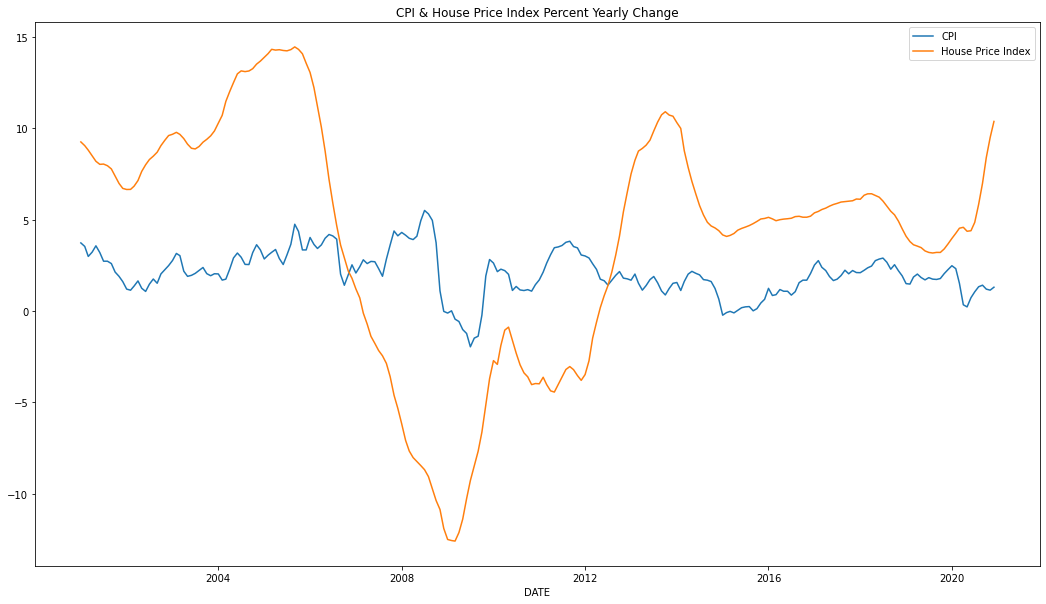

In [88]:
plt.figure(figsize=(18, 10))
plt.plot(cpi_df["DATE"], cpi_df["Percent Yearly Change"], label="CPI")
plt.plot(cpi_df["DATE"], houseIndex_df["Percent Change From Year Ago"], label="House Price Index")
plt.xlabel("DATE")
plt.title("CPI & House Price Index Percent Yearly Change")
plt.legend()

In [89]:
# px.line(x=cpi_df["DATE"], y=[cpi_df["Percent Yearly Change"] , houseIndex_df["Percent Change From Year Ago"]])

## Stock Exchange 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

### NASDAQ Composite

In [16]:
nasdaq_df = pd.read_csv("../Raw Data/NASDAQCOM.csv")

In [17]:
nasdaq_df.columns

Index(['DATE', 'NASDAQCOM_NBD20000101'], dtype='object')

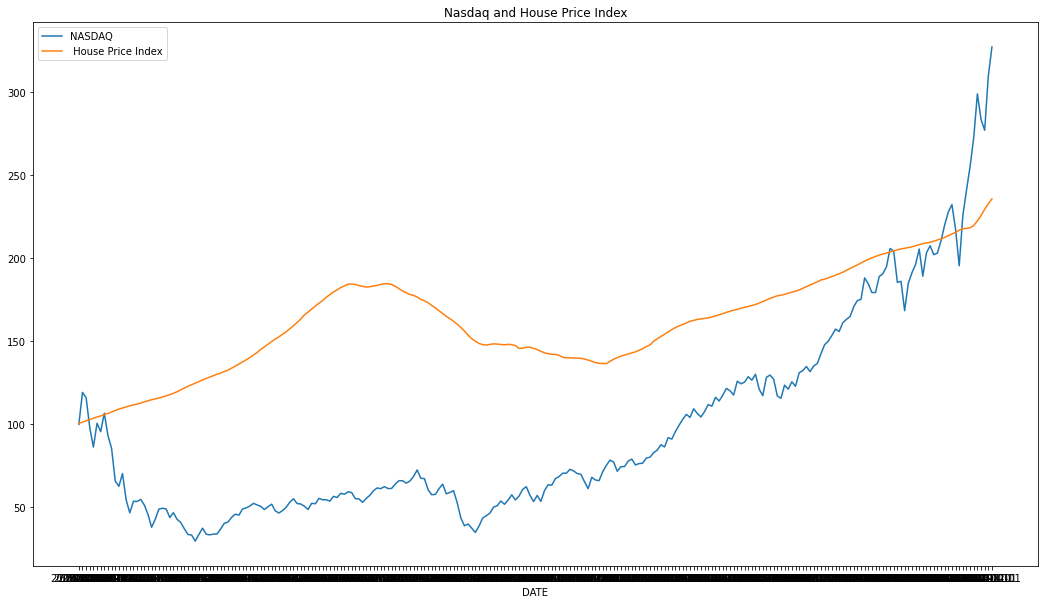

In [97]:
plt.figure(figsize=(18, 10))
plt.plot(nasdaq_df["DATE"], nasdaq_df["NASDAQCOM"], label="NASDAQ")
plt.plot(nasdaq_df["DATE"], houseIndex_df["CSUSHPISA"], label = " House Price Index")
plt.xlabel("DATE")
plt.title("Nasdaq and House Price Index")
plt.legend()

In [98]:
# px.line(x=nasdaq_df["DATE"], y=[nasdaq_df["NASDAQCOM_NBD20000101"], houseIndex_df["CSUSHPISA"]])

### Preprocessing and Feature Engineering 

In [19]:
def monthly_changes(df, column_name):
    monthly_change=[0]
    monthly_percent_change=[0]
    for idx in range(1,len(df)):
        change = df.loc[idx][column_name] - df.loc[idx-1][column_name]
        percent_change = change/df.loc[idx-1][column_name]*100
        monthly_change.append(change)
        monthly_percent_change.append(percent_change)
    
    return monthly_change, monthly_percent_change

In [20]:
def yearly_changes(df, column_name):
    yearly_change = [np.NaN for _ in range(12)]
    yearly_percent_change = [np.NaN for _ in range(12)]
    for idx in range(12,len(df)):
        change = df.loc[idx][column_name] - df.loc[idx-12][column_name]
        percent_change = change/df.loc[idx-12][column_name]*100
        yearly_change.append(change)
        yearly_percent_change.append(percent_change)
    return yearly_change, yearly_percent_change
    

In [21]:
def add_columns(df, column_name):
    monthly_change , percent_monthly_change = monthly_changes(df, column_name)
    yearly_change, percent_yearly_change = yearly_changes(df, column_name)
    df["Monthly Change"] = monthly_change
    df["Percent Monthly Change"] = percent_monthly_change
    df["Yearly Change"] = yearly_change
    df["Percent Yearly Change"] = percent_yearly_change
#     return df

In [22]:
add_columns(nasdaq_df, "NASDAQCOM_NBD20000101")

In [23]:
nasdaq_df.columns

Index(['DATE', 'NASDAQCOM_NBD20000101', 'Monthly Change',
       'Percent Monthly Change', 'Yearly Change', 'Percent Yearly Change'],
      dtype='object')

In [75]:
nasdaq_df.to_csv("../Dataset/nasdaq.csv", index= False)

## Treasury Bonds

In [24]:
t_5yr = pd.read_csv("../Raw Data/5 Yr Treasury - GS5.csv", parse_dates=[0])
t_10yr = pd.read_csv("../Raw Data/10 Yr Treasury - DGS10.csv", parse_dates=[0])
t_30yr = pd.read_csv("../Raw Data/30 Yr Treasury - GS30.csv", parse_dates=[0])

In [25]:
add_columns(t_5yr, "GS5")

In [26]:
t_5yr.columns

Index(['DATE', 'GS5', 'Monthly Change', 'Percent Monthly Change',
       'Yearly Change', 'Percent Yearly Change'],
      dtype='object')

In [27]:
add_columns(t_10yr, "DGS10")
t_10yr.columns

Index(['DATE', 'DGS10', 'Monthly Change', 'Percent Monthly Change',
       'Yearly Change', 'Percent Yearly Change'],
      dtype='object')

In [28]:
add_columns(t_30yr, "GS30")
t_30yr.columns

Index(['DATE', 'GS30', 'Monthly Change', 'Percent Monthly Change',
       'Yearly Change', 'Percent Yearly Change'],
      dtype='object')

In [91]:
t_5yr.to_csv("../Dataset/t_5yr.csv", index=False)
t_10yr.to_csv("../Dataset/t_10yr.csv", index=False)
t_30yr.to_csv("../Dataset/t_30yr.csv", index = False)

### Plotting Monthly Change

Treasury Bonds: 5 yr, 10 yr and 30 yr vs House Price Index

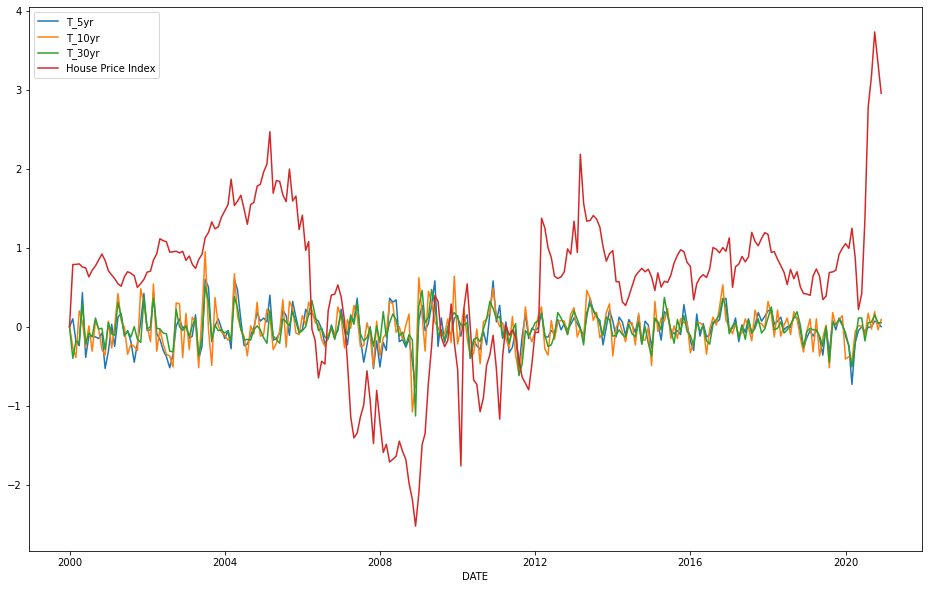

In [100]:
plt.figure(figsize=(16, 10))
plt.plot(t_5yr["DATE"], t_5yr["Monthly Change"], label="T_5yr")
plt.plot(t_10yr["DATE"], t_10yr["Monthly Change"], label="T_10yr")
plt.plot(t_30yr["DATE"], t_30yr["Monthly Change"], label="T_30yr")
plt.plot(t_5yr["DATE"], houseIndex_df["Change from Last Month"], label="House Price Index")
plt.xlabel("DATE")
plt.legend()

In [101]:
# px.line(x=t_5yr["DATE"], y=[t_5yr["Monthly Change"], t_10yr["Monthly Change"], t_30yr["Monthly Change"], houseIndex_df["Change from Last Month"]])

### Plotting Monthly Percent Change

Treasury Bonds: 5 yr, 10 yr and 30 yr vs House Price Index

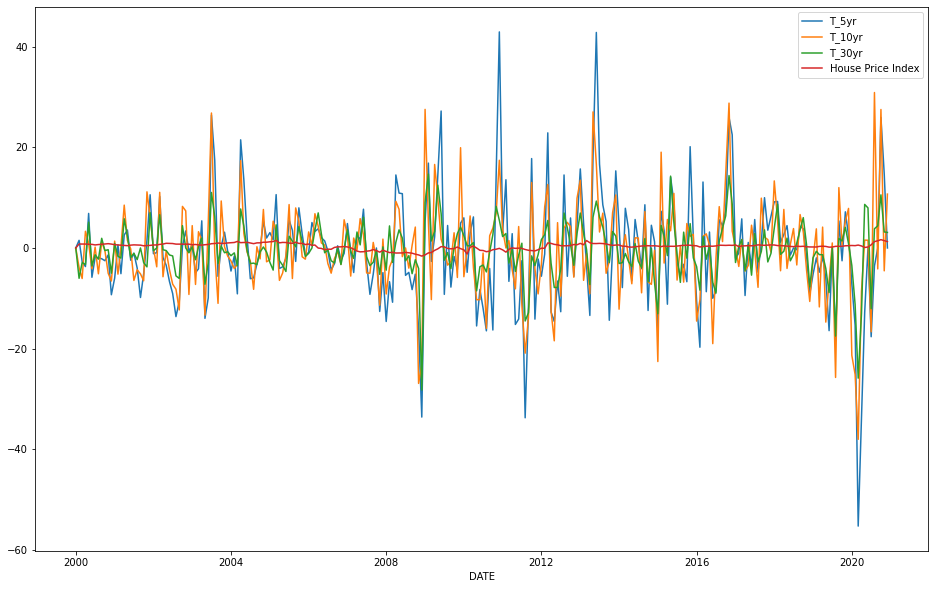

In [102]:
plt.figure(figsize=(16, 10))
plt.plot(t_5yr["DATE"], t_5yr["Percent Monthly Change"], label="T_5yr")
plt.plot(t_10yr["DATE"], t_10yr["Percent Monthly Change"], label="T_10yr")
plt.plot(t_30yr["DATE"], t_30yr["Percent Monthly Change"], label="T_30yr")
plt.plot(t_5yr["DATE"], houseIndex_df["Percent Change from Last Month"], label="House Price Index")
plt.xlabel("DATE")
plt.legend()

In [103]:
# px.line(x=t_5yr["DATE"], y=[t_5yr["Percent Monthly Change"], t_10yr["Percent Monthly Change"], t_30yr["Percent Monthly Change"], houseIndex_df["Percent Change from Last Month"]])

### Wilhshire 5000 Index

In [32]:
wil_df = pd.read_csv("../Raw Data/WILL5000PR.csv", parse_dates=[0])

In [33]:
wil_df.head()

,DATE,WILL5000PR_NBD20000101
0,2000-01-01,100.00000
1,2000-02-01,102.11918
2,2000-03-01,108.05374
3,2000-04-01,102.35121
4,2000-05-01,98.65721


In [36]:
wil_df = wil_df.rename(columns={"WILL5000PR_NBD20000101": "WILL5000PR" })

In [37]:
add_columns(wil_df, "WILL5000PR")

In [38]:
wil_df.columns

Index(['DATE', 'WILL5000PR', 'Monthly Change', 'Percent Monthly Change',
       'Yearly Change', 'Percent Yearly Change'],
      dtype='object')

In [106]:
#wil_df.to_csv("../Dataset/wil5000.csv", index=False)

In [40]:
# nasdaq_df = nasdaq_df.rename(columns={"NASDAQCOM_NBD20000101": "NASDAQCOM"})

In [104]:
# nasdaq_df.to_csv("../Dataset/nasdaq.csv", index= False)

### Stock Indexes (Wilshire 5000 & Nasdaq Composite) vs (Consumer Price Index)

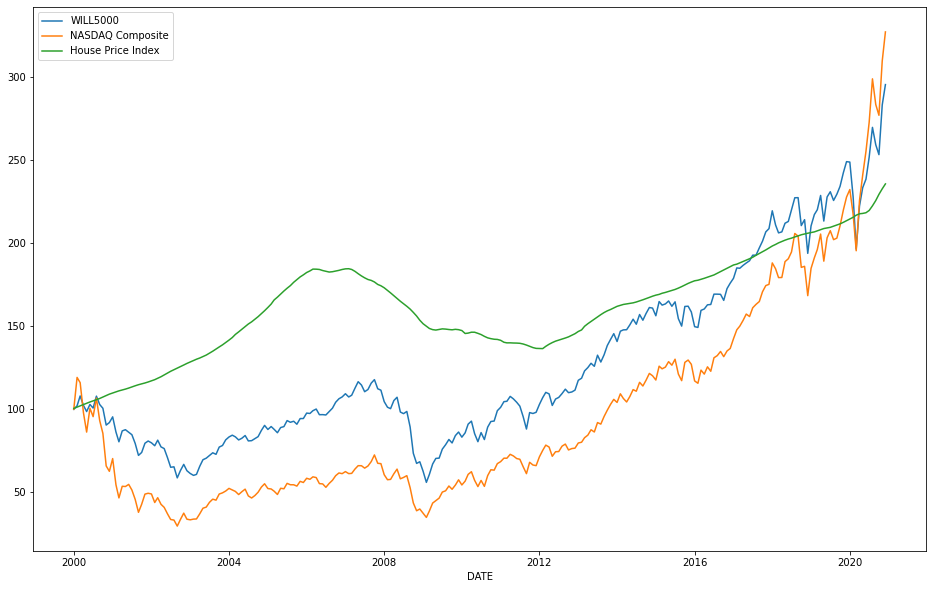

In [105]:
plt.figure(figsize=(16, 10))
plt.plot(wil_df["DATE"], wil_df["WILL5000PR"], label="WILL5000")
plt.plot(wil_df["DATE"], nasdaq_df["NASDAQCOM"], label="NASDAQ Composite")
plt.plot(wil_df["DATE"], houseIndex_df["CSUSHPISA"], label="House Price Index")
plt.xlabel("DATE")
plt.legend()

In [106]:
# px.line(x=wil_df["DATE"], y=[wil_df["WILL5000PR"], nasdaq_df["NASDAQCOM"], houseIndex_df["CSUSHPISA"]])

### Plotting Stock Indexes vs Monthly Change

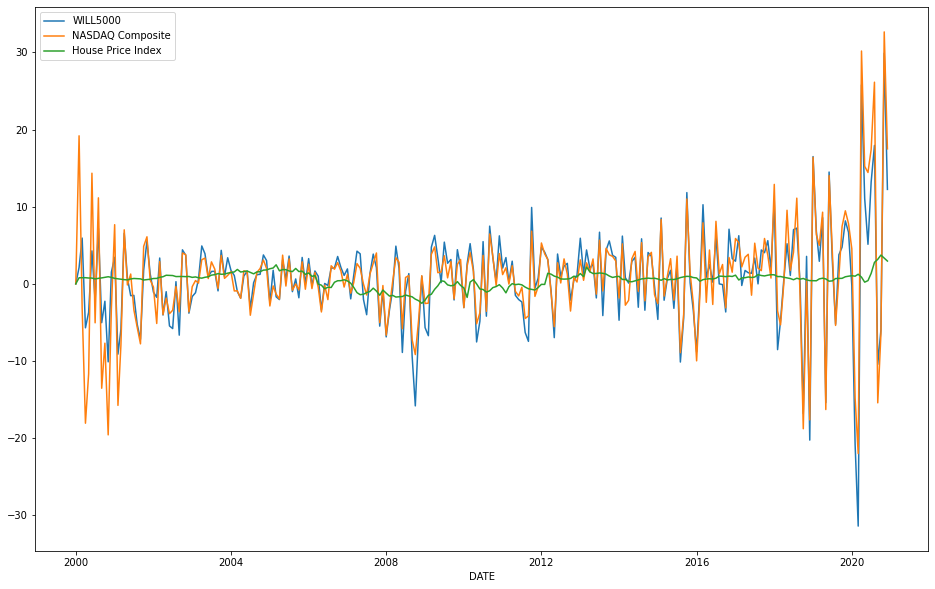

In [107]:
plt.figure(figsize=(16, 10))
plt.plot(wil_df["DATE"], wil_df["Monthly Change"], label="WILL5000")
plt.plot(wil_df["DATE"], nasdaq_df["Monthly Change"], label="NASDAQ Composite")
plt.plot(wil_df["DATE"], houseIndex_df["Change from Last Month"], label="House Price Index")
plt.xlabel("DATE")
plt.legend()

In [108]:
# px.line(x=wil_df["DATE"], y=[wil_df["Monthly Change"], nasdaq_df["Monthly Change"], houseIndex_df["Change from Last Month"]])

## Mortgage Interest Rates

In [43]:
fixed15_mortgage = pd.read_csv("../Raw Data/MORTGAGE15US.csv", parse_dates=[0])
fixed30_mortgage = pd.read_csv("../Raw Data/MORTGAGE30US.csv", parse_dates=[0])
adjust5n1_mortgage = pd.read_csv("../Raw Data/MORTGAGE5US.csv", parse_dates=[0])

In [44]:
merged1 = pd.merge(fixed15_mortgage, fixed30_mortgage, on="DATE", how="outer")

In [45]:
merged2 = pd.merge(merged1, adjust5n1_mortgage, on="DATE", how="outer" )

In [46]:
merged2 = merged2.drop(252)

In [47]:
#add columns updated
def add_columns_updated(df, column_name):
    monthly_change , percent_monthly_change = monthly_changes(df, column_name)
    yearly_change, percent_yearly_change = yearly_changes(df, column_name)
    df[f"{column_name}_Monthly Change"] = monthly_change
    df[f"{column_name}_Percent Monthly Change"] = percent_monthly_change
    df[f"{column_name}_Yearly Change"] = yearly_change
    df[f"{column_name}_Percent Yearly Change"] = percent_yearly_change
#     return df

In [48]:
merged2.columns

Index(['DATE', 'MORTGAGE15US', 'MORTGAGE30US', 'MORTGAGE5US'], dtype='object')

In [49]:
add_columns_updated(merged2, "MORTGAGE15US")

In [50]:
merged2.columns

Index(['DATE', 'MORTGAGE15US', 'MORTGAGE30US', 'MORTGAGE5US',
       'MORTGAGE15US_Monthly Change', 'MORTGAGE15US_Percent Monthly Change',
       'MORTGAGE15US_Yearly Change', 'MORTGAGE15US_Percent Yearly Change'],
      dtype='object')

In [51]:
add_columns_updated(merged2, "MORTGAGE30US")
add_columns_updated(merged2, "MORTGAGE5US")

In [52]:
merged2.columns

Index(['DATE', 'MORTGAGE15US', 'MORTGAGE30US', 'MORTGAGE5US',
       'MORTGAGE15US_Monthly Change', 'MORTGAGE15US_Percent Monthly Change',
       'MORTGAGE15US_Yearly Change', 'MORTGAGE15US_Percent Yearly Change',
       'MORTGAGE30US_Monthly Change', 'MORTGAGE30US_Percent Monthly Change',
       'MORTGAGE30US_Yearly Change', 'MORTGAGE30US_Percent Yearly Change',
       'MORTGAGE5US_Monthly Change', 'MORTGAGE5US_Percent Monthly Change',
       'MORTGAGE5US_Yearly Change', 'MORTGAGE5US_Percent Yearly Change'],
      dtype='object')

In [133]:
# merged2.to_csv("../Dataset/mortgage.csv", index=False)

In [53]:
mortgage_df = pd.read_csv("../Dataset/mortgage.csv", parse_dates=[0])

### Monthly Change in Mortgage Maturity Rate: A comparison in 15 year Fixed, 30 Year Fixed and 1/5  Year Adjustable

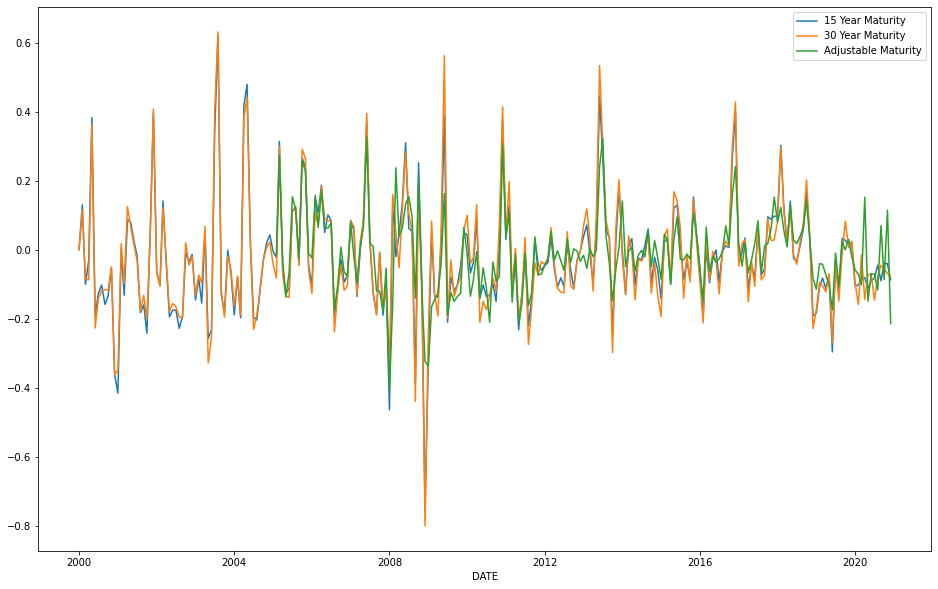

In [109]:
plt.figure(figsize=(16, 10))
plt.plot(mortgage_df["DATE"], mortgage_df["MORTGAGE15US_Monthly Change"], label="15 Year Maturity")
plt.plot(mortgage_df["DATE"], mortgage_df["MORTGAGE30US_Monthly Change"], label="30 Year Maturity")
plt.plot(mortgage_df["DATE"], mortgage_df["MORTGAGE5US_Monthly Change"], label="Adjustable Maturity")
plt.xlabel("DATE")
plt.legend()

In [110]:
# px.line(mortgage_df, x="DATE", y=["MORTGAGE15US_Monthly Change", "MORTGAGE30US_Monthly Change", "MORTGAGE5US_Monthly Change"])

### Mothly Change in 30 yr fixed Mortgage Maturity Rate vs House Price Index

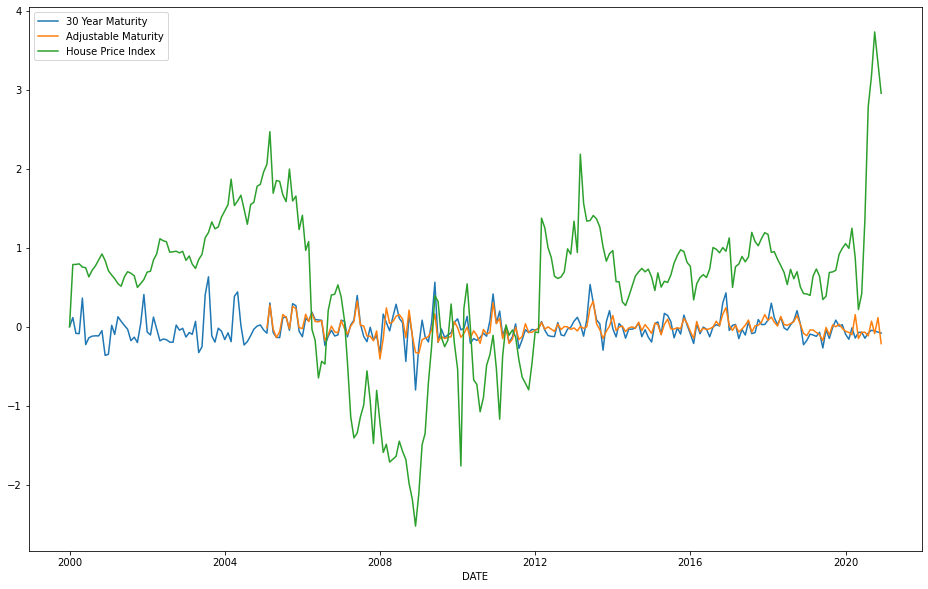

In [111]:
plt.figure(figsize=(16, 10))
# plt.plot(mortgage_df["DATE"], mortgage_df["MORTGAGE15US_Monthly Change"], label="15 Year Maturity")
plt.plot(mortgage_df["DATE"], mortgage_df["MORTGAGE30US_Monthly Change"], label= "30 Year Maturity")
plt.plot(mortgage_df["DATE"], mortgage_df["MORTGAGE5US_Monthly Change"], label= "Adjustable Maturity")
plt.plot(mortgage_df["DATE"], houseIndex_df["Change from Last Month"], label = "House Price Index")
plt.xlabel("DATE")
plt.legend()

In [112]:
# px.line(x=mortgage_df["DATE"], y=[mortgage_df["MORTGAGE30US_Monthly Change"], houseIndex_df["Change from Last Month"]])

## 1 Unit - Residential Complex Construction

In [56]:
pvt_home_comp = pd.read_csv("../Raw Data/Private Homes Completed - COMPU1USA.csv", parse_dates=[0])
pvt_home_cons = pd.read_csv("../Raw Data/Private Home Under Construction - UNDCON1USA.csv", parse_dates=[0])

**Unit** : 100 of Thousands 

### Preprocessing 

In [57]:
pvt_home_comp = pvt_home_comp.rename(columns={"COMPU1USA": "Completed"})

In [58]:
pvt_home_cons = pvt_home_cons.rename(columns={"UNDCON1USA": "Under Construction"})

In [59]:
home_stat_df = pvt_home_comp.merge(pvt_home_cons, on="DATE", how="outer")

In [60]:
home_stat_df["Completed"] = np.array(home_stat_df["Completed"])/100

In [61]:
home_stat_df["Under Construction"] = np.array(home_stat_df["Under Construction"])/100

In [158]:
# home_stat_df.to_csv("../Dataset/House Construction.csv", index=False)

## Total Construction & Residential Construction

In [62]:
resd_cons = pd.read_csv("../Raw Data/Residential Construction Spending - TLRESCONS.csv", parse_dates=[0])

In [63]:
resd_cons = resd_cons.rename(columns={"TLRESCONS":"Residential Construction Spending"})

In [64]:
resd_cons

,DATE,Residential Construction Spending
0,2002-01-01,382979
1,2002-02-01,391434
2,2002-03-01,390942
3,2002-04-01,404255
4,2002-05-01,399164
...,...,...
223,2020-08-01,624410
224,2020-09-01,629972
225,2020-10-01,659365
226,2020-11-01,679699


In [65]:
home_stat_df.merge(resd_cons, on="DATE", how="outer")

,DATE,Completed,Under Construction,Residential Construction Spending
0,2000-01-01,12.62,6.79,NaN
1,2000-02-01,13.26,6.78,NaN
2,2000-03-01,13.12,6.75,NaN
3,2000-04-01,13.07,6.72,NaN
4,2000-05-01,13.34,6.66,NaN
...,...,...,...,...
247,2020-08-01,8.95,5.26,624410.0
248,2020-09-01,9.12,5.42,629972.0
249,2020-10-01,8.83,5.65,659365.0
250,2020-11-01,8.97,5.86,679699.0


In [173]:
# home_stat_df.to_csv("../Dataset/House Construction.csv", index=False)